#### Import libraries and load datafile

In [1]:
#Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Until fuction: line seperator
def print_ln():
    print('-'*80, '\n')
    
pd.options.display.float_format = '{:.2f}'.format

# Load csv data file
telecom_orig = pd.read_csv('telecom_churn_data.csv', low_memory=False)

In [2]:
# Understand the properties of loaded dataframe

telecom = telecom_orig.copy()
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5)

Dataframe Shape:  (99999, 226)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
-------------------------------------------------------------------------------- 



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,...,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,...,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


#### Missing Value Treatment
- Delete: Delete the missing values
- Impute:
- Imputing by a simple statistic: Replace the missing values by another value, commonly the mean, median, mode etc.
- Predictive techniques: Use statistical models such as k-NN, SVM etc. to predict and impute missing values

##### COLUMN-WISE: MISSING VALUES

In [3]:
# summing up the missing values (column-wise)
telecom.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [4]:
# Percentage of missing values (column-wise)
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
                        ... 
arpu_2g_9              74.08
night_pck_user_6       74.85
night_pck_user_7       74.43
night_pck_user

In [5]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8 

#### Filtering high-value customers: 
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.Below are the columns for that:

- total_rech_data_6 
- total_rech_data_7 
- av_rech_amt_data_6 
- av_rech_amt_data_7 

In [6]:
# All these columns has more than 70% missing values

print(telecom.total_rech_data_6.describe()); print_ln()
print(telecom.total_rech_data_7.describe()); print_ln()
print(telecom.av_rech_amt_data_6.describe()); print_ln()
print(telecom.av_rech_amt_data_7.describe()); print_ln()

count   25153.00
mean        2.46
std         2.79
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        61.00
Name: total_rech_data_6, dtype: float64
-------------------------------------------------------------------------------- 

count   25571.00
mean        2.67
std         3.03
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        54.00
Name: total_rech_data_7, dtype: float64
-------------------------------------------------------------------------------- 

count   25153.00
mean      192.60
std       192.65
min         1.00
25%        82.00
50%       154.00
75%       252.00
max      7546.00
Name: av_rech_amt_data_6, dtype: float64
-------------------------------------------------------------------------------- 

count   25571.00
mean      200.98
std       196.79
min         0.50
25%        92.00
50%       154.00
75%       252.00
max      4365.00
Name: av_rech_amt_data_7, dtype: float64
---------------------------------------------

As these columns could lead us to high-valued customer we can't drop them despite having more than 70% missing value. So we have to look for Imputation and we have to look at the distribution to find out the value.

(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <a list of 25 Patch objects>)

<Figure size 432x288 with 0 Axes>

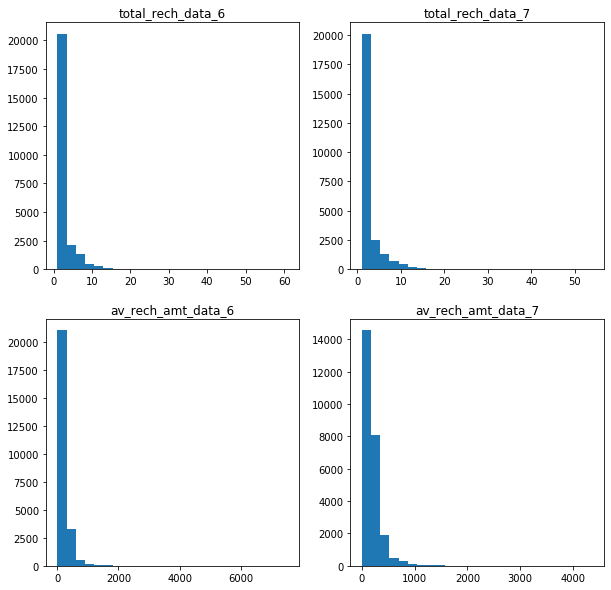

In [7]:
# total_rech_data_6

plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(telecom.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7

plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(telecom.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6

plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(telecom.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7

plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(telecom.av_rech_amt_data_7.dropna(),bins=25)

##### Distribution Grapha Insights:

- Variables are numeric. 
- The minimum value is 1, and not zero, 
- missing -- indicating that no recharge was done in this month. 
- Thus, missing values can be imputed with 0.

In [8]:
telecom.total_rech_data_6.fillna(value=0, inplace=True)
telecom.total_rech_data_7.fillna(value=0, inplace=True)
telecom.total_rech_data_8.fillna(value=0, inplace=True)
telecom.total_rech_data_9.fillna(value=0, inplace=True)

telecom.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_9.fillna(value=0, inplace=True)

- av_rech_amt_data
- arpu_2g
- arpu_3g
- count_rech_2g
- count_rech_3g
- max_rech_data
- total_rech_data
- fb_user
- night_pck_user

We can choose to impute missing values of these columns with 0.

In [9]:
# Since av_rech_amt_data_* features are important for getting the high-value customers,
#lets impute the missing av_rech_amt_data_* with 0

def imputeNan(data,imputeColList=False,missingColList=False):
    # Function impute the nan with 0
    # argument: colList, list of columns for which nan is to be replaced with 0
    
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [10]:
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
imputeNan(telecom,imputeCol)

In [11]:
# Columns with more than 50% missing values

colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
colmns_missing_data[colmns_missing_data >= 50]

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
dtype: float64

In [12]:
drop_data_columns = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
telecom.drop(drop_data_columns, axis=1, inplace=True)

In [13]:
telecom.shape

(99999, 222)

In [14]:
def getMissingValues(missingCutoff):
    # Function to retun the columns with more than missingCutoff% missing values.
    # argument: missingCutoff, % values threshold for missing values
    missing = round(100*(telecom.isnull().sum()/telecom.shape[0]))
    print("There are {} features having more than {}% missing values".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [15]:
# Missing values per column expressed as % of total number of values > 5%

getMissingValues(5)

There are 29 features having more than 5% missing values


onnet_mou_9        8.00
offnet_mou_9       8.00
roam_ic_mou_9      8.00
roam_og_mou_9      8.00
loc_og_t2t_mou_9   8.00
loc_og_t2m_mou_9   8.00
loc_og_t2f_mou_9   8.00
loc_og_t2c_mou_9   8.00
loc_og_mou_9       8.00
std_og_t2t_mou_9   8.00
std_og_t2m_mou_9   8.00
std_og_t2f_mou_9   8.00
std_og_t2c_mou_9   8.00
std_og_mou_9       8.00
isd_og_mou_9       8.00
spl_og_mou_9       8.00
og_others_9        8.00
loc_ic_t2t_mou_9   8.00
loc_ic_t2m_mou_9   8.00
loc_ic_t2f_mou_9   8.00
loc_ic_mou_9       8.00
std_ic_t2t_mou_9   8.00
std_ic_t2m_mou_9   8.00
std_ic_t2f_mou_9   8.00
std_ic_t2o_mou_9   8.00
std_ic_mou_9       8.00
spl_ic_mou_9       8.00
isd_ic_mou_9       8.00
ic_others_9        8.00
dtype: float64

Looks like all these features for the month sep(9) are missing together.

We can choose to impute these values with 0 as they are large data and dropping them would lead us to lack of data for analysis

In [16]:
telecom.update(telecom[['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']].fillna(0))

In [17]:
telecom.shape

(99999, 222)

In [18]:
# Missing values per column expressed as % of total number of values
getMissingValues(2)

There are 89 features having more than 2% missing values


onnet_mou_6           4.00
onnet_mou_7           4.00
onnet_mou_8           5.00
offnet_mou_6          4.00
offnet_mou_7          4.00
offnet_mou_8          5.00
roam_ic_mou_6         4.00
roam_ic_mou_7         4.00
roam_ic_mou_8         5.00
roam_og_mou_6         4.00
roam_og_mou_7         4.00
roam_og_mou_8         5.00
loc_og_t2t_mou_6      4.00
loc_og_t2t_mou_7      4.00
loc_og_t2t_mou_8      5.00
loc_og_t2m_mou_6      4.00
loc_og_t2m_mou_7      4.00
loc_og_t2m_mou_8      5.00
loc_og_t2f_mou_6      4.00
loc_og_t2f_mou_7      4.00
loc_og_t2f_mou_8      5.00
loc_og_t2c_mou_6      4.00
loc_og_t2c_mou_7      4.00
loc_og_t2c_mou_8      5.00
loc_og_mou_6          4.00
loc_og_mou_7          4.00
loc_og_mou_8          5.00
std_og_t2t_mou_6      4.00
std_og_t2t_mou_7      4.00
std_og_t2t_mou_8      5.00
                      ... 
loc_ic_t2f_mou_8      5.00
loc_ic_mou_6          4.00
loc_ic_mou_7          4.00
loc_ic_mou_8          5.00
std_ic_t2t_mou_6      4.00
std_ic_t2t_mou_7      4.00
s

Let's drop these customers from the data.

In [19]:
missingcol = list(getMissingValues(2).index)
telecom=telecom[~telecom[missingcol].isnull().all(axis=1)]
telecom.shape

There are 89 features having more than 2% missing values


(99618, 222)

In [20]:

# For other customers where these missing values are spread out, let's impute them with zero. 

missingcol.remove('date_of_last_rech_8')
missingcol.remove('date_of_last_rech_9')
imputeNan(telecom,missingColList=missingcol)

In [21]:
getMissingValues(0)

There are 9 features having more than 0% missing values


loc_og_t2o_mou         1.00
std_og_t2o_mou         1.00
loc_ic_t2o_mou         1.00
last_date_of_month_8   1.00
last_date_of_month_9   1.00
date_of_last_rech_6    1.00
date_of_last_rech_7    1.00
date_of_last_rech_8    3.00
date_of_last_rech_9    4.00
dtype: float64

In [22]:
#Some of these features take only one value. Lets impute their missing values in these features with the mode

col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    
    telecom[c].fillna(telecom[c].mode()[0], inplace=True)

In [23]:
# Missing values per column expressed as % of total number of values
getMissingValues(0)

There are 4 features having more than 0% missing values


date_of_last_rech_6   1.00
date_of_last_rech_7   1.00
date_of_last_rech_8   3.00
date_of_last_rech_9   4.00
dtype: float64

All the 4 columns have dates of june,july,aug, sep respectively.So we can easily impute them.

In [24]:
telecom[telecom['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
telecom[telecom['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
telecom[telecom['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
telecom[telecom['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

/home/sarvammittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/sarvammittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sarvammittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

There are some columns who has all the values as 0.Lets look at them.

In [25]:
zero_columns=telecom.columns[(telecom == 0).all()]
zero_columns


Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

We can remove these columns as they are of no use.

In [26]:
telecom.drop(zero_columns,axis=1,inplace=True)

In [27]:
# Percentage of data left after removing the missing values.

print("Percentage of data remaining after treating missing values: {}%".format(round(telecom.shape[0]/99999 *100,2)))
print ("Number of customers: {}".format(telecom.shape[0]))
print ("Number of features: {}".format(telecom.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of customers: 99618
Number of features: 211


##### Fixing the data-type and column names

In [28]:
telecom.reset_index(inplace=True,drop=True)

# list of all columns which have date

date_columns = list(telecom.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [29]:
# Converting dtype of date columns to datetime

for col in date_columns:
    telecom[col] = pd.to_datetime(telecom[col], format='%m/%d/%Y')

#####  Some monthly features which are not in the standard naming (_6,_7,_8,_9) :

- 'jun_vbc_3g' : 'vbc_3g_6'
- 'jul_vbc_3g' : 'vbc_3g_7'
- 'aug_vbc_3g' : 'vbc_3g_8'
- 'sep_vbc_3g' : 'vbc_3g_9'

In [30]:
telecom.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

#### Filter high-value customers
Defining high-value customers as follows:

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

##### Creating New Features

vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9'

These will store the total data volume (= vol_2gmb + vol_3gmb) used by user.

In [31]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9',

for i in range(6,10):
    telecom['vol_data_mb_'+str(i)] = (telecom['vol_2g_mb_'+str(i)]+telecom['vol_3g_mb_'+str(i)]).astype(int)


avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

These will store the average recharge value for each customer for every month

In [32]:
# Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
for i in range(6,10):
    telecom['avg_rech_amt_'+str(i)] = round(telecom['total_rech_amt_'+str(i)]/telecom['total_rech_num_'+str(i)]+1,2)

In [33]:
imputeNan(telecom,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'])

total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9

These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each month.

In [34]:
#Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9

for i in range(6,10):
    telecom['total_rech_num_data_'+str(i)] = (telecom['count_rech_2g_'+str(i)]+telecom['count_rech_3g_'+str(i)]).astype(int)

total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9

These will store the total amount of data recharge (=total_rech_num_data * av_rech_amt_data ) for each month.

In [35]:
#Creating new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9

for i in range(6,10):
    telecom['total_rech_amt_data_'+str(i)] = telecom['total_rech_num_data_'+str(i)]*telecom['av_rech_amt_data_'+str(i)]

total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9

These will store the total recharge amount (= total_rech_amt + total_rech_amt_data ) for each customer, for each month.

In [36]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in range(6,10):
    telecom['total_month_rech_'+str(i)] = telecom['total_rech_amt_'+str(i)]+telecom['total_rech_amt_data_'+str(i)]

In [37]:
# calculating the average of first two months (good phase) total monthly recharge amount

avg_goodPhase =(telecom.total_month_rech_6 + telecom.total_month_rech_7)/2

# finding the cutoff which is the 70th percentile of the good phase average recharge amounts

hv_cutoff= np.percentile(avg_goodPhase,70)

# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.

hv_users = telecom[avg_goodPhase >=  hv_cutoff]
hv_users.reset_index(inplace=True,drop=True)

print("Number of High-Value Customers in the Dataset: %d\n"% len(hv_users))
print("Percentage High-value users in data : {}%".format(round(len(hv_users)/telecom.shape[0]*100),2))

Number of High-Value Customers in the Dataset: 29906

Percentage High-value users in data : 30%



##### Tagging Churners
churned customers (churn=1, else 0) based on the fourth month as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

- Function to tag customers as churners (churn=1, else 0) based on 'vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_'
- Argument: churnPhaseMonth, indicating the month number to be used to define churn (default= 9)

In [38]:
def getChurnStatus(data,churnPhaseMonth=9):
    
    churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    flag = ~data[[s + str(churnPhaseMonth) for s in churn_features ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [39]:
hv_users['churn'] = getChurnStatus(hv_users,9)
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(hv_users[hv_users.churn == 1]),hv_users.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(hv_users[hv_users.churn == 1])/hv_users.shape[0] *100,2)))

There are 2418 users tagged as churners out of 29906 High-Value Customers.
High-value Churn Percentage : 8.09%


/home/sarvammittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


There are just 8.09% churn cases.
This indicated an highly imbalanced data set where the churn cases are the minority(8.14%) as opposed to the non-churners who are the majority(91.91)

##### Identify columns that have no varience & Drop

In [40]:
# Identify columns that have no varience
hv_users_unique_count = hv_users.nunique().sort_values(ascending=False)
hv_users_unique_count

mobile_number           29906
arpu_7                  29006
arpu_6                  28986
arpu_8                  28001
arpu_9                  26949
total_og_mou_7          23628
total_og_mou_6          23471
total_og_mou_8          22267
total_og_mou_9          21299
offnet_mou_7            21221
offnet_mou_6            21181
total_ic_mou_7          20129
offnet_mou_8            20124
total_ic_mou_6          20078
total_ic_mou_8          19553
offnet_mou_9            19115
total_ic_mou_9          18989
loc_ic_mou_6            18491
loc_og_mou_7            18478
loc_ic_mou_7            18470
loc_og_mou_6            18324
loc_ic_mou_8            18038
loc_og_mou_8            17550
loc_ic_mou_9            17537
loc_og_mou_9            17091
onnet_mou_7             16961
onnet_mou_6             16859
std_og_mou_7            15924
std_og_mou_6            15888
onnet_mou_8             15837
                        ...  
count_rech_3g_8            29
sachet_3g_8                29
count_rech

In [41]:
# Identify bad colums that has no information (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
hv_users_unique_count_is_zero = hv_users_unique_count[hv_users_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", hv_users_unique_count_is_zero); print_ln();

drop_no_varience_columns = list(hv_users_unique_count_is_zero.index)
drop_no_varience_columns

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
-------------------------------------------------------------------------------- 



[]

In [42]:
# Find columns with all same entries and add to drop_columns list

hv_users_unique_count_is_one = hv_users_unique_count[hv_users_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", hv_users_unique_count_is_one); print_ln();

drop_no_varience_columns += list(hv_users_unique_count_is_one.index)

Dataframe Unique Value Count is ONE (all same values): 
 last_date_of_month_9    1
last_date_of_month_8    1
last_date_of_month_7    1
last_date_of_month_6    1
circle_id               1
dtype: int64
-------------------------------------------------------------------------------- 



In [43]:
hv_users.drop(drop_no_varience_columns, axis=1, inplace=True)

print('Dataframe Shape: ', hv_users.shape); print_ln();
print('Number of columns dropped here  = ', len(drop_no_varience_columns))
print('Dataframe Shape: ', hv_users.shape); print_ln();

Dataframe Shape:  (29906, 227)
-------------------------------------------------------------------------------- 

Number of columns dropped here  =  5
Dataframe Shape:  (29906, 227)
-------------------------------------------------------------------------------- 



/home/sarvammittal/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
hv_users.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,total_rech_num_data_9,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9,churn
0,7000842753,197.38,214.82,213.80,21.10,0.00,0.00,0.00,0.00,0.00,...,0,252.00,252.00,252.00,0.00,614.00,504.00,504.00,0.00,1
1,7000701601,1069.18,1349.85,3171.48,500.00,57.84,54.68,52.29,0.00,453.43,...,0,0.00,0.00,0.00,0.00,1580.00,790.00,3638.00,0.00,1
2,7001524846,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,...,0,0.00,354.00,207.00,0.00,437.00,955.00,327.00,186.00,0
3,7002124215,514.45,597.75,637.76,578.60,102.41,132.11,85.14,161.63,757.93,...,0,0.00,0.00,0.00,0.00,600.00,680.00,718.00,680.00,0
4,7000887461,74.35,193.90,366.97,811.48,48.96,50.66,33.58,15.74,85.41,...,1,0.00,712.00,540.00,252.00,0.00,1166.00,979.00,504.00,0


##### ROW-WISE: MISSING VALUES

In [45]:
# sum it up to check how many rows have all missing values
print("Rows with all NULL values =",  hv_users.isnull().all(axis=1).sum())

# sum of misisng values in each row
rows_missing_data = hv_users.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0].max()

Rows with all NULL values = 0


3

So no need to drop the values.

In [46]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(hv_users.isnull().sum()/len(hv_users.index)), 2)
df[df > 0]

date_of_last_rech_6   0.24
date_of_last_rech_7   0.30
date_of_last_rech_8   1.90
date_of_last_rech_9   2.68
dtype: float64

Note: The remaining missing values are in date columns, before imputing convert them into appropreate values for analysis.

In [47]:
# covert date columns to python datetime format
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
hv_users[date_vars].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-21,2014-07-16,2014-08-08
1,2014-06-27,2014-07-25,2014-08-26
2,2014-06-25,2014-07-31,2014-08-30
3,2014-06-30,2014-07-31,2014-08-31
4,2014-06-18,2014-07-07,2014-08-24


In [48]:
# convert to datetime
for col in date_vars:
    hv_users[col] = pd.to_datetime(hv_users[col])

print(hv_users[date_vars].info())
hv_users[date_vars].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29906 entries, 0 to 29905
Data columns (total 3 columns):
date_of_last_rech_6    29833 non-null datetime64[ns]
date_of_last_rech_7    29815 non-null datetime64[ns]
date_of_last_rech_8    29338 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 701.0 KB
None


/home/sarvammittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-21,2014-07-16,2014-08-08
1,2014-06-27,2014-07-25,2014-08-26
2,2014-06-25,2014-07-31,2014-08-30
3,2014-06-30,2014-07-31,2014-08-31
4,2014-06-18,2014-07-07,2014-08-24


In [49]:
# Create new days columns, instead of date
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

hv_users["rech_days_left_6"]      = (last_date_of_month_6 - hv_users.date_of_last_rech_6).astype('timedelta64[D]')
hv_users["rech_days_left_7"]      = (last_date_of_month_7 - hv_users.date_of_last_rech_7).astype('timedelta64[D]')
hv_users["rech_days_left_8"]      = (last_date_of_month_8 - hv_users.date_of_last_rech_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]

print(hv_users[day_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29906 entries, 0 to 29905
Data columns (total 3 columns):
rech_days_left_6    29833 non-null float64
rech_days_left_7    29815 non-null float64
rech_days_left_8    29338 non-null float64
dtypes: float64(3)
memory usage: 701.0 KB
None


/home/sarvammittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/sarvammittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sarvammittal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [50]:
# Drop all old date columns: add dates columns to drop_column list
hv_users.drop(date_vars, axis=1, inplace=True)
telecom1 = hv_users.copy()

print('Number of columns droped here  = ', len(date_vars))
print('Dataframe Shape: ', hv_users.shape)

Number of columns droped here  =  3
Dataframe Shape:  (29906, 227)


In [51]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(hv_users.isnull().sum()/len(hv_users.index)), 2)
df[df > 0]

date_of_last_rech_9   2.68
rech_days_left_6      0.24
rech_days_left_7      0.30
rech_days_left_8      1.90
dtype: float64

In [52]:
hv_users[['rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']].describe()


,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,29833.00,29815.00,29338.00
mean,3.53,3.72,4.31
std,4.67,4.58,5.27
min,0.00,0.00,0.00
25%,0.00,0.00,1.00
50%,2.00,2.00,3.00
75%,5.00,5.00,6.00
max,29.00,30.00,30.00


In [53]:
# Mean & Median are different: imputing with median value for recharge days left 
hv_users.loc[np.isnan(hv_users['rech_days_left_6']), ['rech_days_left_6']] = hv_users['rech_days_left_6'].median()
hv_users.loc[np.isnan(hv_users['rech_days_left_7']), ['rech_days_left_7']] = hv_users['rech_days_left_7'].median()
hv_users.loc[np.isnan(hv_users['rech_days_left_8']), ['rech_days_left_8']] = hv_users['rech_days_left_8'].median()


/home/sarvammittal/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [54]:

print("\nTotal Number of missing values in the data frame = {}".format(hv_users.isnull().sum().sum()))



Total Number of missing values in the data frame = 802


There are 802 missing values so we can drop them directly as it will not have much effect on the dataset

In [55]:
hv_users=hv_users.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
hv_users.shape

(29104, 227)

### Outlier treatment

In [56]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
hv_users.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,total_rech_amt_data_8,total_rech_amt_data_9,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,29104.00,29104.00,29104.00,29104.00,29104.00,29104.00,29104.00,29104.00,29104.00,29104.00,...,29104.00,29104.00,29104.00,29104.00,29104.00,29104.00,29104.00,29104.00,29104.00,29104.00
mean,7001207709.85,556.87,564.52,517.49,479.02,260.27,269.28,238.46,216.98,372.96,...,474.89,390.45,1116.11,1201.60,1070.19,948.93,0.06,3.51,3.61,4.15
std,689987.77,456.36,481.35,503.53,502.07,457.95,480.32,462.14,439.54,480.08,...,1645.14,1591.58,1579.25,1648.57,1824.58,1769.48,0.24,4.63,4.41,5.05
min,7000000074.00,-2258.71,-1289.71,-345.13,-1899.51,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7000610475.00,309.87,313.68,241.35,207.30,17.31,16.54,11.73,8.03,71.75,...,0.00,0.00,546.00,558.00,414.00,350.00,0.00,0.00,0.00,1.00
50%,7001205551.00,480.65,483.70,435.08,397.38,85.10,84.14,68.63,58.19,222.55,...,25.00,23.00,785.00,820.00,704.00,645.00,0.00,2.00,2.00,3.00
75%,7001804306.25,697.13,701.27,668.34,634.87,290.45,293.23,247.09,217.69,487.44,...,358.00,252.00,1207.00,1280.00,1170.00,1097.00,0.00,5.00,5.00,6.00
90%,7002165307.50,987.99,998.03,986.83,944.12,750.52,786.72,677.65,615.16,892.93,...,1148.70,1008.00,2010.00,2200.00,2066.70,1893.70,0.00,10.00,10.00,10.00
95%,7002284548.10,1237.37,1263.91,1265.26,1213.88,1128.27,1188.95,1085.76,1002.70,1252.36,...,2268.00,1734.00,2903.85,3179.00,3074.00,2678.00,1.00,14.00,14.00,15.00
99%,7002385519.37,1980.59,2003.40,1989.92,1970.62,2146.08,2194.69,2165.53,2112.84,2314.62,...,5813.88,4437.58,6313.88,7207.73,6912.91,5833.76,1.00,19.00,18.00,25.00


- Most of the outliers are on the revenue data and the model being built is on usage of voice and data.
- Hence there is no need to treat these outliers

##### Save the cleaned data in new file

In [57]:
# write treated telecom file
hv_users.to_csv("telecom_churn_data_clean.csv", sep=',', index=False)

## Data Analysis

- Univariate
- Bivatiate Analysis
- Check imbalance in data-set (dependent variable)

In [60]:
# # Load csv data file
telecom_orig = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
telecom = telecom_orig.copy()

##### Dependent Variable: check data imbalance

In [61]:
#checking whether data is imbalanced or not
churn  = telecom["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))
print_ln()

Total Churn Count     = 1844
Total Not-Churn Count = 27260
Churn Rate            = 6.34%
-------------------------------------------------------------------------------- 



Data is highly imbalanced, we need to balance it before we can create the model

#### Univariate Analysis on 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

In [62]:
df_not_churn = telecom[telecom["churn"] == 0]
df_churn     = telecom[telecom["churn"] == 1]

In [63]:
#calculation of mean for churn or non churn
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_6"]))
print(np.mean(df_churn["total_rech_num_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_6"]))
print(np.median(df_churn["total_rech_num_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_6"],np.arange(0,100,25)))

Mean:
11.704365370506236
14.287960954446854
median:
9.0
11.0
Quantiles:
[ 0.  6.  9. 14.]
[ 0.  7. 11. 18.]


/home/sarvammittal/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


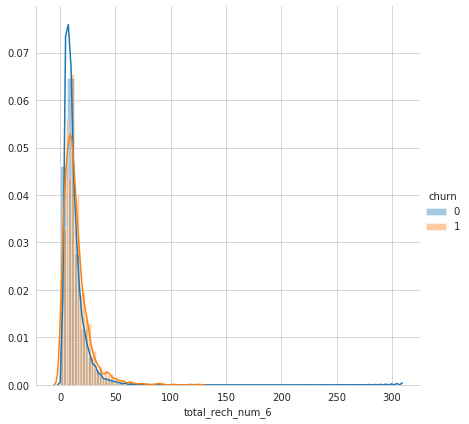

In [64]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_6").add_legend()

#its difficult to know about the churning rate based on total_rech_num_6 feature as overlaped data.

In [65]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_7"]))
print(np.mean(df_churn["total_rech_num_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_7"]))
print(np.median(df_churn["total_rech_num_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_7"],np.arange(0,100,25)))

Mean:
11.799192956713133
12.302603036876356
median:
9.0
9.0
Quantiles:
[ 0.  6.  9. 15.]
[ 0.  5.  9. 16.]


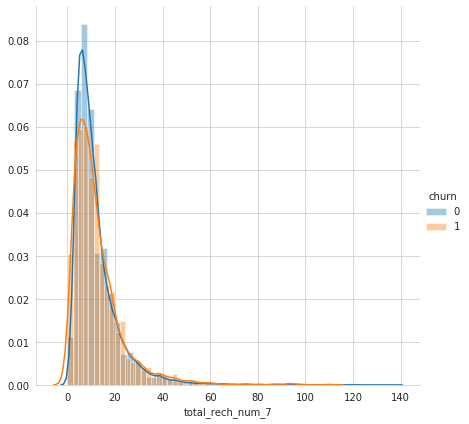

In [66]:
#feature importance of total_rech_data_7
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_7").add_legend()

#its difficult to know about the churning rate based on total_rech_data_7 feature as overlaped data.

In [67]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_8"]))
print(np.mean(df_churn["total_rech_num_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_8"]))
print(np.median(df_churn["total_rech_num_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_8"],np.arange(0,100,25)))

Mean:
10.452971386647102
6.009219088937093
median:
8.0
4.0
Quantiles:
[ 0.  4.  8. 13.]
[0. 2. 4. 7.]


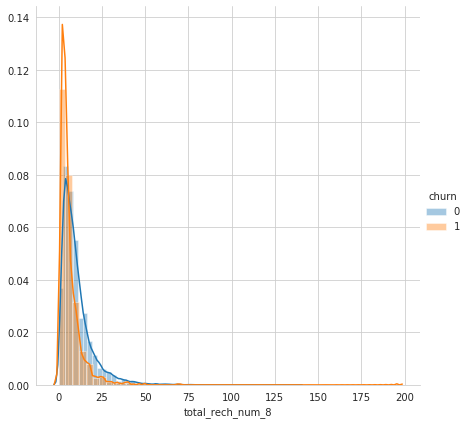

In [68]:
#feature importance of total_rech_amt_8
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_8").add_legend()

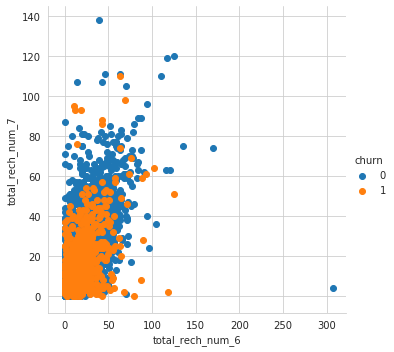

In [69]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

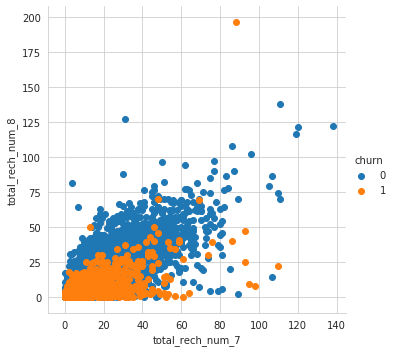

In [70]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()

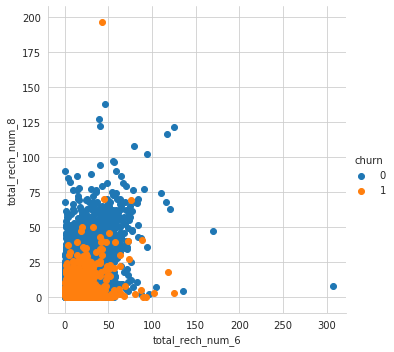

In [71]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_8").add_legend()

##### Univariate Analysis on 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',

In [72]:

print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_6"]))
print(np.mean(df_churn["total_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_6"]))
print(np.median(df_churn["total_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_6"],np.arange(0,100,25)))

Mean:
649.7822083639031
784.7293926247288
median:
558.0
655.0
Quantiles:
[  0. 360. 558. 816.]
[   0.  400.  655. 1000.]


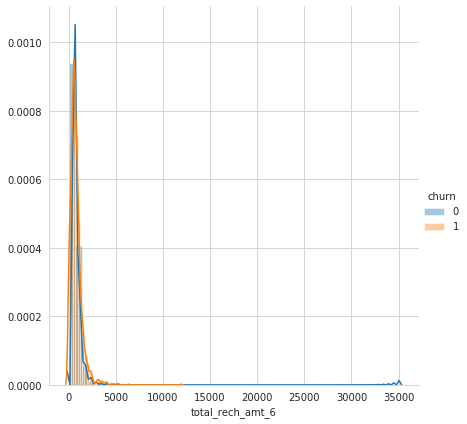

In [73]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_6").add_legend()

In [74]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_7"]))
print(np.mean(df_churn["total_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_7"]))
print(np.median(df_churn["total_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_7"],np.arange(0,100,25)))

Mean:
664.6992296404989
668.2711496746203
median:
567.0
551.5
Quantiles:
[  0. 360. 567. 831.]
[  0.  252.  551.5 900.5]


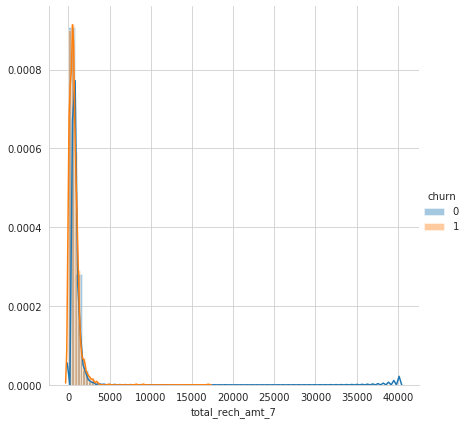

In [75]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_7").add_legend()

In [76]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_8"]))
print(np.mean(df_churn["total_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_8"]))
print(np.median(df_churn["total_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_8"],np.arange(0,100,25)))

Mean:
616.1982391782832
286.2744034707158
median:
513.0
87.0
Quantiles:
[  0. 282. 513. 800.]
[  0.   0.  87. 400.]


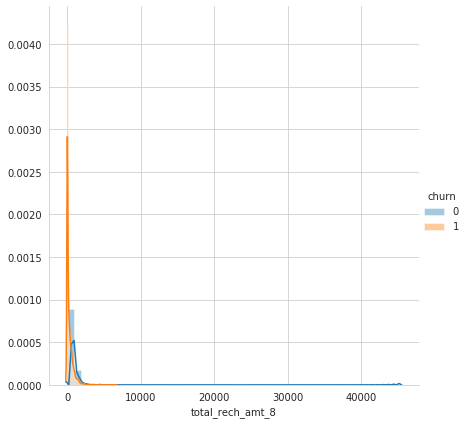

In [77]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_8").add_legend()

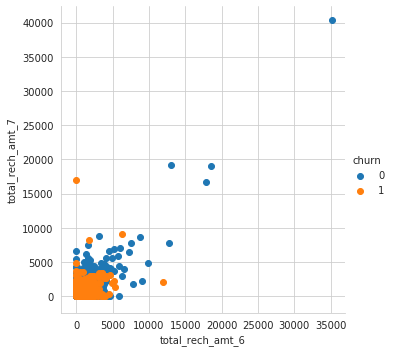

In [78]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()

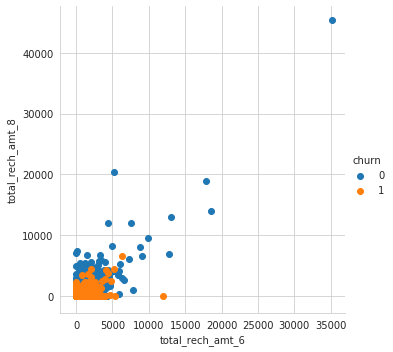

In [79]:

sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

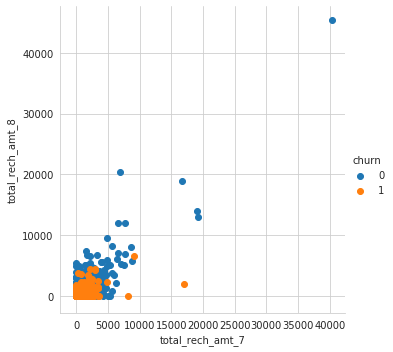

In [80]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

#### Univariate Analysis on max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',

In [81]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_6"]))
print(np.mean(df_churn["max_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_6"]))
print(np.median(df_churn["max_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_6"],np.arange(0,100,25)))

Mean:
167.9883345561262
163.7966377440347
median:
120.0
110.0
Quantiles:
[  0. 110. 120. 200.]
[  0.  90. 110. 154.]


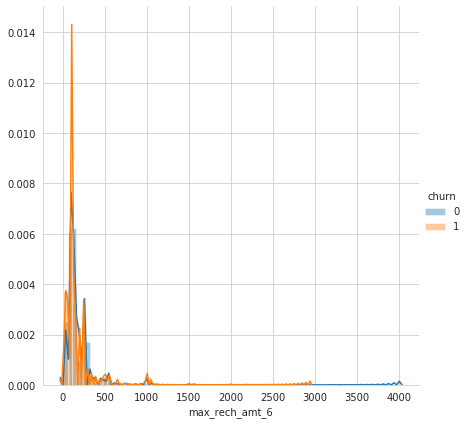

In [82]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_6").add_legend()

In [83]:

print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_7"]))
print(np.mean(df_churn["max_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_7"]))
print(np.median(df_churn["max_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_7"],np.arange(0,100,25)))

Mean:
172.61515040352165
164.08676789587852
median:
130.0
110.0
Quantiles:
[  0. 110. 130. 200.]
[  0.  50. 110. 152.]


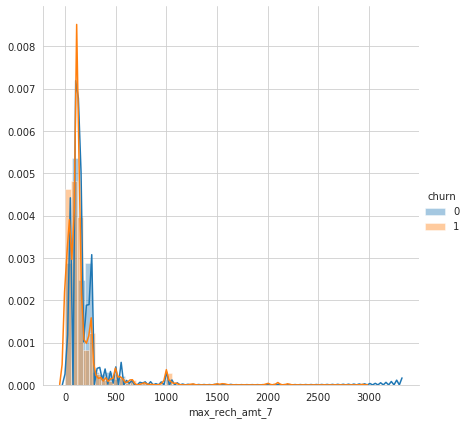

In [84]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_7").add_legend()

In [85]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_8"]))
print(np.mean(df_churn["max_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_8"]))
print(np.median(df_churn["max_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_8"],np.arange(0,100,25)))

Mean:
166.54952311078503
93.84815618221258
median:
144.0
33.5
Quantiles:
[  0.  67. 144. 198.]
[  0.    0.   33.5 130. ]


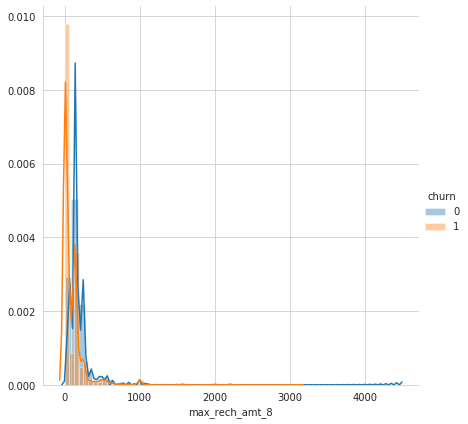

In [86]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_8").add_legend()

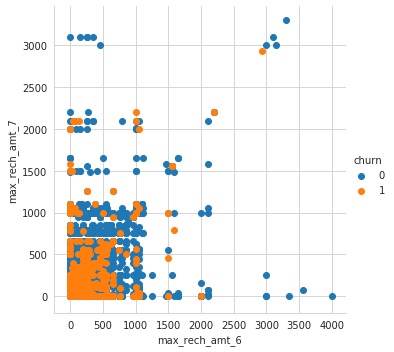

In [87]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()

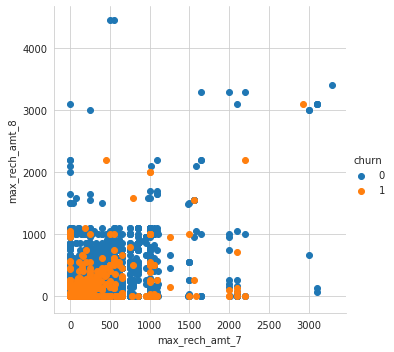

In [88]:

sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()

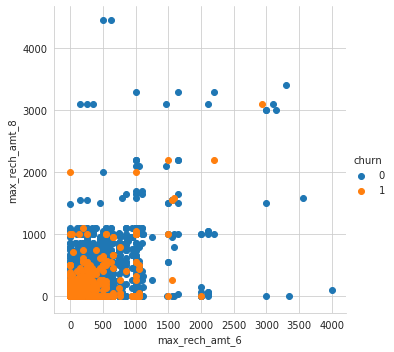

In [89]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()

In [90]:
telecom2 = telecom.drop(['mobile_number', 'churn'], axis=1)

### Bivariate Analysis

In [94]:
# Create correlation matrix
corr_matrix = telecom2.corr().abs()
corr_matrix.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9,rech_days_left_6,rech_days_left_7,rech_days_left_8
arpu_6,1.00,0.69,0.64,0.59,0.35,0.22,0.19,0.19,0.52,0.35,...,0.02,0.00,0.02,0.42,0.22,0.22,0.21,0.18,0.05,0.08
arpu_7,0.69,1.00,0.77,0.69,0.21,0.32,0.27,0.23,0.35,0.49,...,0.09,0.03,0.03,0.23,0.42,0.28,0.25,0.12,0.17,0.11
arpu_8,0.64,0.77,1.00,0.80,0.16,0.23,0.34,0.28,0.29,0.38,...,0.03,0.13,0.08,0.22,0.29,0.44,0.33,0.08,0.16,0.19
arpu_9,0.59,0.69,0.80,1.00,0.13,0.17,0.25,0.34,0.25,0.30,...,0.02,0.07,0.14,0.21,0.26,0.34,0.44,0.07,0.10,0.16
onnet_mou_6,0.35,0.21,0.16,0.13,1.00,0.75,0.63,0.57,0.09,0.04,...,0.10,0.08,0.06,0.03,0.02,0.02,0.01,0.17,0.09,0.09


In [95]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [96]:
# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

In [97]:
print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:89

['arpu_9', 'onnet_mou_8', 'onnet_mou_9', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_mou_9', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',

#### OBSERVATION: 
- 89 highly correlated features (> 80%) found in the data set.
- We are not dropping these columns manually rather using feature reduction methods to do the job. We worked with RFE, LASSO and PCA.We can also use Random Forest.
- Data is higly imbalanced only 6.34% data is churn & remaining is non_churn
- From univariate analysis some relationship is emerging to the churn, but no clear relationship found.
- There are many highly correlated features, found 89 features with more then 0.8 correlation.


#### NEXT STEPS:

- Need to balance the data, apply suitable data-balancing method
- Features are highly correlated, use feture reduction methods before modelling.